# Market Risk- Returns and Risk-2

#### Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Setting working directory

In [12]:
import os
os.chdir('E:\AIMLGLIM\FINANCE_RISK_ANALYTICS\Market_Risk\Market Risk')
os.getcwd()

'E:\\AIMLGLIM\\FINANCE_RISK_ANALYTICS\\Market_Risk\\Market Risk'

Let us now go ahead and read the dataset and check the first five rows of the dataset

#### Importing the dataset

In [13]:
stock_prices = pd.read_csv('Multiple Stock Data.csv')

#Glimpse of Data
stock_prices.head()

,Date,Bharti Airtel,DLF,ACC,BHEL,TCS,Maruti Suzuki,Reliance,Dr. Reddy,ITC,TATA Steel
0,04-04-2016,299,114,1320,74,1086,3269,507,2907,188,282
1,11-04-2016,314,117,1345,80,1128,3555,521,2965,194,291
2,18-04-2016,315,118,1294,77,1079,3636,508,3005,191,310
3,25-04-2016,325,125,1321,75,1132,3615,480,2954,190,307
4,02-05-2016,321,121,1305,76,1104,3639,474,2742,186,288


#### Fixing messy column names (containing spaces) for ease of use

In [14]:
stock_prices.columns = stock_prices.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')

#### Checking top 5 rows again

In [15]:
stock_prices.head()


,Date,Bharti_Airtel,DLF,ACC,BHEL,TCS,Maruti_Suzuki,Reliance,Dr_Reddy,ITC,TATA_Steel
0,04-04-2016,299,114,1320,74,1086,3269,507,2907,188,282
1,11-04-2016,314,117,1345,80,1128,3555,521,2965,194,291
2,18-04-2016,315,118,1294,77,1079,3636,508,3005,191,310
3,25-04-2016,325,125,1321,75,1132,3615,480,2954,190,307
4,02-05-2016,321,121,1305,76,1104,3639,474,2742,186,288


#### First, let us check the number of rows (observations) and the number of columns (variables)

In [16]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 209 
The number of columns (variables) is 11


#### Checking data types of all columns

In [17]:
stock_prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           209 non-null    object
 1   Bharti_Airtel  209 non-null    int64 
 2   DLF            209 non-null    int64 
 3   ACC            209 non-null    int64 
 4   BHEL           209 non-null    int64 
 5   TCS            209 non-null    int64 
 6   Maruti_Suzuki  209 non-null    int64 
 7   Reliance       209 non-null    int64 
 8   Dr_Reddy       209 non-null    int64 
 9   ITC            209 non-null    int64 
 10  TATA_Steel     209 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 18.1+ KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [18]:
stock_prices.describe()

,Bharti_Airtel,DLF,ACC,BHEL,TCS,Maruti_Suzuki,Reliance,Dr_Reddy,ITC,TATA_Steel
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,350.023923,175.933014,1452.014354,72.066986,1559.129187,6751.588517,947.488038,2619.282297,243.411483,468.248804
std,63.412981,34.734782,138.215776,17.025019,416.373200,1463.828372,331.231503,345.415722,27.615719,108.987099
min,262.000000,106.000000,934.000000,20.000000,968.000000,3269.000000,457.000000,1892.000000,154.000000,270.000000
25%,308.000000,151.000000,1371.000000,63.000000,1150.000000,5761.000000,646.000000,2382.000000,228.000000,371.000000
50%,337.000000,177.000000,1466.000000,74.000000,1489.000000,6887.000000,925.000000,2612.000000,246.000000,470.000000
75%,373.000000,199.000000,1544.000000,83.000000,1963.000000,7658.000000,1238.000000,2891.000000,260.000000,547.000000
max,565.000000,262.000000,1711.000000,107.000000,2195.000000,9428.000000,1593.000000,3462.000000,309.000000,703.000000


#### Lets us plot & see price trend over time for different companies

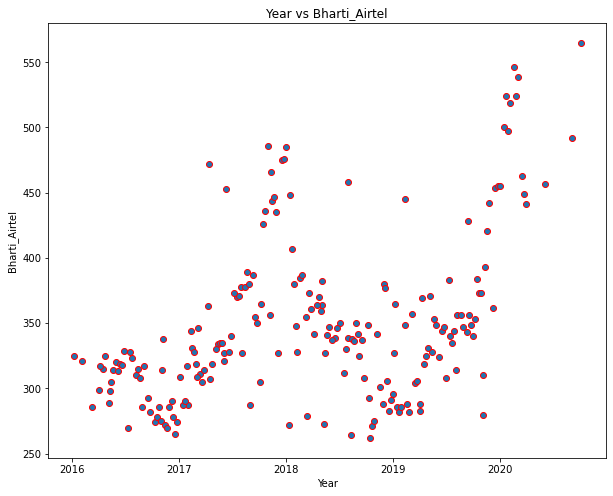

In [19]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Bharti_Airtel'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Bharti_Airtel')
plt.title('Year vs Bharti_Airtel')

plt.show()


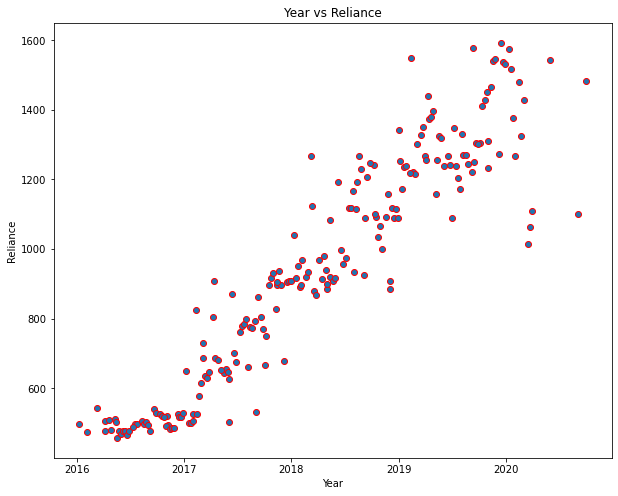

In [20]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Reliance'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Reliance')
plt.title('Year vs Reliance')
plt.show()

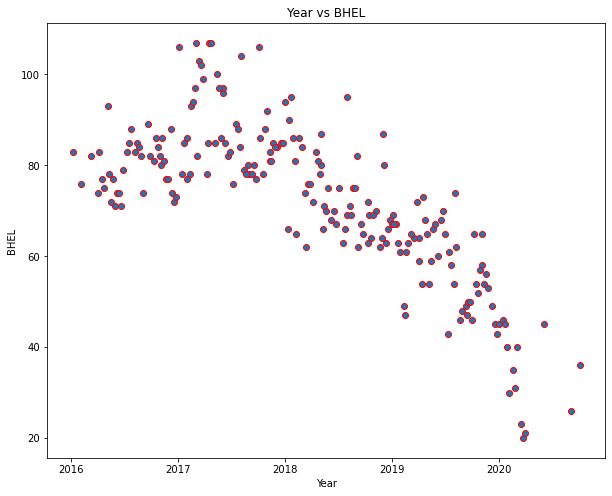

In [21]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['BHEL'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('BHEL')
plt.title('Year vs BHEL')

plt.show()

# Analyzing returns

Steps for calculating returns from prices:
- Take logarithms
- Take differences

In [30]:
np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

,Bharti_Airtel,DLF,ACC,BHEL,TCS,Maruti_Suzuki,Reliance,Dr_Reddy,ITC,TATA_Steel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.048949,0.025975,0.018762,0.077962,0.037945,0.083871,0.027239,0.019755,0.031416,0.031416
2,0.003180,0.008511,-0.038656,-0.038221,-0.044411,0.022529,-0.025269,0.013401,-0.015585,0.063249
3,0.031253,0.057629,0.020651,-0.026317,0.047951,-0.005792,-0.056695,-0.017117,-0.005249,-0.009725
4,-0.012384,-0.032523,-0.012186,0.013245,-0.025046,0.006617,-0.012579,-0.074473,-0.021277,-0.063887
...,...,...,...,...,...,...,...,...,...,...
204,-0.009588,-0.040410,-0.015674,-0.032790,0.056457,0.025612,-0.044795,0.080069,-0.083150,-0.081789
205,-0.053425,-0.149864,-0.097841,-0.143101,-0.158456,-0.098900,-0.139643,-0.094522,-0.116339,-0.073671
206,-0.060752,-0.176351,-0.044531,-0.122602,-0.005046,-0.139445,-0.082316,0.004151,0.081041,-0.092867
207,-0.030704,-0.007168,-0.161769,-0.139762,0.022235,-0.089108,0.046251,0.006880,-0.074569,-0.073076


In [34]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

#### Checking the rows & columns of dataset

In [35]:
stock_returns.shape

(209, 10)

#### Checking top 5 rows 

In [36]:
stock_returns.head()

,Bharti_Airtel,DLF,ACC,BHEL,TCS,Maruti_Suzuki,Reliance,Dr_Reddy,ITC,TATA_Steel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.048949,0.025975,0.018762,0.077962,0.037945,0.083871,0.027239,0.019755,0.031416,0.031416
2,0.003180,0.008511,-0.038656,-0.038221,-0.044411,0.022529,-0.025269,0.013401,-0.015585,0.063249
3,0.031253,0.057629,0.020651,-0.026317,0.047951,-0.005792,-0.056695,-0.017117,-0.005249,-0.009725
4,-0.012384,-0.032523,-0.012186,0.013245,-0.025046,0.006617,-0.012579,-0.074473,-0.021277,-0.063887


### We now look at Means & Standard Deviations of these returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [37]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Bharti_Airtel    0.001868
DLF              0.000884
ACC             -0.001546
BHEL            -0.006055
TCS              0.002485
Maruti_Suzuki    0.001305
Reliance         0.003767
Dr_Reddy         0.000341
ITC             -0.000686
TATA_Steel      -0.000209
dtype: float64

#### Calculating stock standard deviation

In [38]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Bharti_Airtel    0.040267
DLF              0.061261
ACC              0.037464
BHEL             0.052869
TCS              0.034130
Maruti_Suzuki    0.036788
Reliance         0.038380
Dr_Reddy         0.042531
ITC              0.032008
TATA_Steel       0.046562
dtype: float64

#### Let us plot & see what they say about stock prices

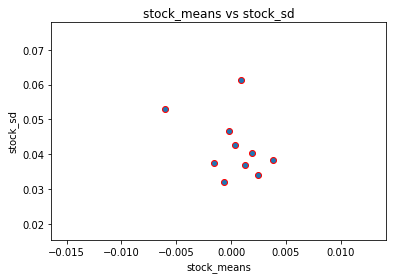

In [46]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()

Stock with a lower mean & higher standard deviation do not play a role in a portfolio that has competing stock with more returns & less risk.
Thus for the data we have here, we are only left few stocks:
- One with highest return and lowest risk &
- One with lowest risk and highest return

Therefore from pure ***Returns*** perspective, Reliance looks good in this dataset &
from pure ***Risk*** perspective (as measured by standard deviation), ITC followed by TCS & Maruti_Suzuki looks good in this dataset

# END